In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="talk", style="darkgrid")

In [49]:
gold = pd.read_csv("/Users/fynn/Uni/DL4NLP/data/Annotationen-Stufe-2-GoldStandard.csv", index_col = 0)
gold.drop(["Annotator", "Filename"], axis=1, inplace=True)
gold.drop_duplicates(inplace=True) # There are 2 duplicates... But they have the same label, so its ok
gold

,Textstelle,Metapher?,Fokus,Rahmen
0,Bei Beobachtung solchen moralischen Wertes ka...,Metapher,NaN,NaN
1,Die Zellen verschmelzen miteinander.,Metaphernkandidat,NaN,NaN
2,das 19. Jahrhundert schließt in dieser Hinsic...,Metapher,NaN,NaN
3,Das Gefühl ist ein Zeuge des jeweilig obwalte...,Metaphernkandidat,NaN,NaN
4,"Der erste Fall bricht die Schutzwehr nieder, ...",Metaphernkandidat,NaN,NaN
...,...,...,...,...
653,In ähnlicher Weise sollen noch mehrere andere ...,Metaphernkandidat,NaN,NaN
654,"Die Amerikaner folgern, da sie alle Rohmateria...",Metapher,"['einer turmhohen Mauer', 'turmhohen Mauer']","['Schutzzöllen', 'von Schutzzöllen']"
655,Sie könne bei ihrer jetzigen großen Kraft und ...,Metaphernkandidat,NaN,NaN
656,"Schwarze Flecken von Habgier, Raubsucht, Unger...",Metaphernkandidat,NaN,NaN


In [50]:
df = pd.read_csv("/Users/fynn/Uni/DL4NLP/data/Annotationen-Stufe-2.txt", index_col=0)
df.drop(["Seite", "Unnamed: 2",
         "Semantikerweiterung?",
         "Unersetzlich?",
         "Unersetzlich?",
         "sprachlich irregulär?",
         "Stärkegrad (A, B, C)",
         "pointiert?"], axis = 1, inplace = True) # 2x Floskel

df = df[~df.Textstelle.isnull()]

df["Metapher"] = (df["Metapher?"] == "Metapher").astype(int)
df["Kandidat"] = (df["Metapher?"] == "Metaphernkandidat").astype(int)
df.drop("Metapher?", axis=1, inplace = True)
df

,Textstelle,Fokus,Rahmen,Begründung/Kommentar,Annotator,Metapher,Kandidat
0,Bei Beobachtung solchen moralischen Wertes ka...,das Horoskop stellen,einer Nation,Horoskop stellen - bezogen auf Nationen ist da...,B,1,0
1,Die Zellen verschmelzen miteinander.,NaN,NaN,Fachausdruck,B,0,1
2,"Diese wolle die bittere Auslese, ohne die auc...",bittere,Auslese,"Unauffällig, aber doch metaphorisch: Dass eine...",B,1,0
3,"Wenn es dem Verfasser gelungen ist, ein gesic...",ein gesichertes Fundament und die ersten Pfeil...,die Lösung der hier zur Bearbeitung gestellten...,"Bruch, Fokus nicht ohne Bedeutungsverlust erse...",B,1,0
4,In Californien ist ebenso die früher dort hei...,NaN,NaN,"kein Bruch, nur auffälliger Ausdruck, keine Be...",B,0,1
...,...,...,...,...,...,...,...
2579,In ähnlicher Weise sollen noch mehrere andere ...,NaN,NaN,NaN,B,0,1
2580,"Die Amerikaner folgern, da sie alle Rohmateria...",einer turmhohen Mauer,Schutzzöllen,NaN,B,1,0
2581,Sie könne bei ihrer jetzigen großen Kraft und ...,mütterlichen Päppelflasche,Sie,NaN,B,1,0
2582,"Schwarze Flecken von Habgier, Raubsucht, Unger...",NaN,NaN,NaN,B,0,1


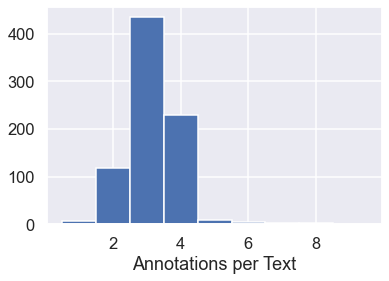

In [123]:
data = df.groupby(["Textstelle"])[["Metapher", "Kandidat"]].sum()
data.reset_index(inplace=True)
data[["Metapher", "Kandidat"]].sum(axis=1).hist(bins = np.arange(0,10,1)+0.5);
#plt.yscale("log")
plt.xlabel("Annotations per Text");

In [124]:
data

,Textstelle,Metapher,Kandidat
0,"""Der politische Körper verwendet in beiden Fä...",2,1
1,"""Immer noch wird durch die protestantische Le...",0,3
2,"""Kein Zweifel"", schreibt Alb. Schaeffle 1), v...",0,3
3,"""Mit je weiterem Blick wir die Stoffwelt zu ü...",1,2
4,"""Solange das Menschengeschlecht seinen Zerstö...",0,3
...,...,...,...
801,verlaufs; sie hat Naturforschung in dem von un...,0,3
802,wenn wir uns ein Prinzip denken und auf Grund ...,1,2
803,wenn wir von dem schlechten Worte »Rechtsphilo...,2,1
804,"»Die Macht, die das Kabinett hat, auf die vers...",0,2


In [125]:
# all 658 gold items are also in Textstelle
np.isin(gold.Textstelle, data.Textstelle).mean()

1.0

In [126]:
not_in_gold = ~np.isin(data.Textstelle, gold.Textstelle)
data[not_in_gold]

,Textstelle,Metapher,Kandidat
15,"Aber noch ist die Zeit nicht gekommen, zu ver...",1,3
28,Angriffe gegen den Staat sind schließlich auc...,1,3
44,Da nun bei der Verschmelzung beider Keimzelle...,0,4
50,Das Gebiet positiven Wissens über den Gang de...,1,3
53,Das also war das Menschenmaterial für den zu ...,0,2
...,...,...,...
726,"Wenn der junge Mann 30 Jahre alt geworden ist,...",0,2
732,"Wenn man die Reihe der bedeutenden Männer, wel...",0,2
743,Wir sind so von dem sicheren Geleise des Konst...,1,1
804,"»Die Macht, die das Kabinett hat, auf die vers...",0,2


# Embedd all Textstellen and compare the leftovers to existing ones by using cosine

In [57]:
from sentence_transformers import SentenceTransformer

model_name = "distiluse-base-multilingual-cased-v2"

model = SentenceTransformer(model_name)

In [59]:
sentences = data.Textstelle

X = model.encode(sentences)
X.shape

(806, 512)

In [65]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, cdist

M = 1-pairwise_distances(X, metric="cosine")
#M = 1-cdist
M

array([[ 1.        ,  0.08989334,  0.1378982 , ...,  0.12552172,
         0.3380593 ,  0.11936921],
       [ 0.08989334,  1.        ,  0.17500716, ...,  0.20417821,
         0.12382293,  0.04537553],
       [ 0.1378982 ,  0.17500716,  1.        , ...,  0.15821826,
         0.22007942, -0.00134552],
       ...,
       [ 0.12552172,  0.20417821,  0.15821826, ...,  1.        ,
        -0.00357687,  0.02381527],
       [ 0.3380593 ,  0.12382293,  0.22007942, ..., -0.00357687,
         1.        ,  0.11389434],
       [ 0.11936921,  0.04537553, -0.00134552, ...,  0.02381527,
         0.11389434,  1.        ]], dtype=float32)

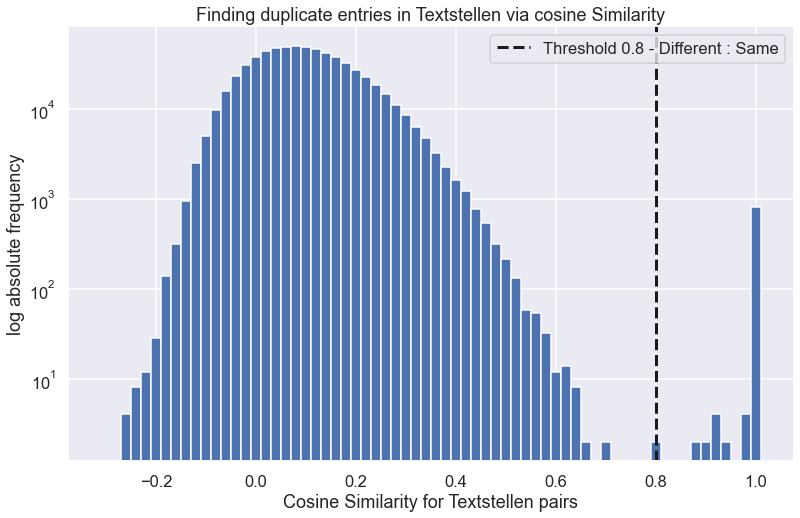

In [129]:
plt.figure(figsize=(13, 8))
plt.hist(M.reshape(-1, 1),
         bins=np.arange(-0.32, 1.02, 0.02)+0.01)
plt.yscale("log")
plt.title("Finding duplicate entries in Textstellen via cosine Similarity")
plt.xlabel("Cosine Similarity for Textstellen pairs")
plt.ylabel("log absolute frequency")
plt.axvline(0.8, lw=3, ls="--", c="k", label="Threshold 0.8 - Different : Same");
plt.legend();

In [94]:
for idx in np.where(not_in_gold)[0]:
#idx = np.where(not_in_gold)[0][0]

    for new_idx in M[idx].argsort()[::-1]:
        if idx == new_idx:
            continue
        
        # once the entries are no longer similar, continue
        # Turns out that all double entries have
        if M[idx, new_idx] < 0.7:
            continue
            
        print("TEXTSTELLE:")
        print(data.loc[idx, "Textstelle"])
        print("ÄHNLICHE TEXTSTELLEN:")

        print(M[idx, new_idx].round(3))
        print(data.loc[new_idx, "Textstelle"])

        if input("\tDOES THIS MATCH?"):
            print(idx, new_idx)
            break



TEXTSTELLE:
 Das also war das Menschenmaterial für den zu gründenden Staat:
ÄHNLICHE TEXTSTELLEN:
0.92377824
 Das also war das Menschenmaterial für den zu gründenden Staat: Menschenfresser.
	DOES THIS MATCH?Y
53 54
TEXTSTELLE:
 Denn das Leben, sagt Endemann3), muß erst »die Rechtsgedanken verarbeiten, die als Keime in die Paragraphen eingeschlossen sind, damit die beiten, die als Keime in die Paragraphen eingeschlossen sind, damit die
ÄHNLICHE TEXTSTELLEN:
0.9712412
 Denn das Leben, sagt Endemann3), muß erst »die Rechtsgedanken verarbeiten, die als Keime in die Paragraphen eingeschlossen sind, damit die beiten, die als Keime in die Paragraphen eingeschlossen sind, damit die Gesetzesbuchstaben lebendig werden.«
	DOES THIS MATCH?Y
75 76
TEXTSTELLE:
 Ein Kurzsichtiger sieht mit Brille oder Fernrohr ebenso viel und mehr wie das beste unbewaffnete Auge und der schwächste Mensch kann mit Hilfe
ÄHNLICHE TEXTSTELLEN:
0.8845428
 Ein Kurzsichtiger sieht mit Brille oder Fernrohr ebenso viel und m

In [101]:
for idx in range(len(data)):
#idx = np.where(not_in_gold)[0][0]
    
    
    for new_idx in M[idx].argsort()[::-1]:
        if idx >= new_idx:
            continue
        
        # once the entries are no longer similar, continue
        if M[idx, new_idx] < 0.7:
            continue
            
        print("TEXTSTELLE:")
        print(data.loc[idx, "Textstelle"])
        print("ÄHNLICHE TEXTSTELLEN:")

        print(M[idx, new_idx].round(3))
        print(data.loc[new_idx, "Textstelle"])

        if input("\tDOES THIS MATCH?"):
            print(idx, new_idx)
            print()
            break
        print()

TEXTSTELLE:
 Das also war das Menschenmaterial für den zu gründenden Staat:
ÄHNLICHE TEXTSTELLEN:
0.924
 Das also war das Menschenmaterial für den zu gründenden Staat: Menschenfresser.
	DOES THIS MATCH?Y
53 54

TEXTSTELLE:
 Denn das Leben, sagt Endemann3), muß erst »die Rechtsgedanken verarbeiten, die als Keime in die Paragraphen eingeschlossen sind, damit die beiten, die als Keime in die Paragraphen eingeschlossen sind, damit die
ÄHNLICHE TEXTSTELLEN:
0.971
 Denn das Leben, sagt Endemann3), muß erst »die Rechtsgedanken verarbeiten, die als Keime in die Paragraphen eingeschlossen sind, damit die beiten, die als Keime in die Paragraphen eingeschlossen sind, damit die Gesetzesbuchstaben lebendig werden.«
	DOES THIS MATCH?Y
75 76

TEXTSTELLE:
 Ein Kurzsichtiger sieht mit Brille oder Fernrohr ebenso viel und mehr wie das beste unbewaffnete Auge und der schwächste Mensch kann mit Hilfe
ÄHNLICHE TEXTSTELLEN:
0.885
 Ein Kurzsichtiger sieht mit Brille oder Fernrohr ebenso viel und mehr wie das